# Challenge - What Do You See?
## Data Fundamentals Lesson 2 Part 4

I have chosen a dataset from the University of Minho in Portugal. The dataset is a collection of student grades for two subjects (math and Portuguese) and numerous demographic and social data points for each student.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Can they be merged?

First I will create data frames for the two datasets (one for math and one for Portuguese) and look at some of the values to see if I can merge them into one data frame.

In [2]:
math_df = pd.read_csv('student-mat.csv', delimiter=';')

math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
port_df = pd.read_csv('student-por.csv', delimiter=';')

port_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


From these subsets of the data, it looks like I will be able to merge these data frames after some small adjustments. The grades for each term are labeled the same for both subjects and the number of absences is different for each class. To adjust for this before trying to merge, I will rename those columns in each data frame to be subject specific.

In [4]:
math_df.rename(columns={'paid': 'math_paid',
                        'absences': 'math_absences', 
                        'G1': 'math_grades1', 
                        'G2': 'math_grades2', 
                        'G3': 'math_grades3'}, inplace=True)

port_df.rename(columns={'paid': 'port_paid',
                        'absences': 'port_absences', 
                        'G1': 'port_grades1', 
                        'G2': 'port_grades2', 
                        'G3': 'port_grades3'}, inplace=True)

math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,math_absences,math_grades1,math_grades2,math_grades3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
merged_df = math_df.merge(port_df)

merged_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,math_absences,math_grades1,math_grades2,math_grades3,port_paid,port_absences,port_grades1,port_grades2,port_grades3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,6,5,6,6,no,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,4,5,5,6,no,2,9,11,11
2,GP,F,15,U,GT3,T,4,2,health,services,...,5,2,15,14,15,no,0,14,14,14
3,GP,F,16,U,GT3,T,3,3,other,other,...,5,4,6,10,10,no,0,11,13,13
4,GP,M,16,U,LE3,T,4,3,services,other,...,5,10,15,15,15,no,6,12,12,13


After making some plots, I realized that the values in study time are non-descriptive categoricals, and rather than try to relabel my axes, I am going to change the values to be more descriptive strings.

Edit: I tried using string values, but they did not order themselves appropriately so I commented out this code and will use descriptive text in the axis label.

In [6]:
#merged_df['studytime'].replace({1: '<2', 2: '2-5', 3: '5-10', 4: '>10'}, inplace=True)

After some work with different plots, I realized I would like a new column that better summarizes math growth and one that summarizes Portuguese growth.

In [7]:
merged_df['math_growth'] = (merged_df['math_grades2'] - merged_df['math_grades1']) + (merged_df['math_grades3'] - merged_df['math_grades2'])

merged_df['port_growth'] = (merged_df['port_grades2'] - merged_df['port_grades1']) + (merged_df['port_grades3'] - merged_df['port_grades2'])

merged_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,math_grades1,math_grades2,math_grades3,port_paid,port_absences,port_grades1,port_grades2,port_grades3,math_growth,port_growth
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,5,6,6,no,4,0,11,11,1,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,5,6,no,2,9,11,11,1,2
2,GP,F,15,U,GT3,T,4,2,health,services,...,15,14,15,no,0,14,14,14,0,0
3,GP,F,16,U,GT3,T,3,3,other,other,...,6,10,10,no,0,11,13,13,4,2
4,GP,M,16,U,LE3,T,4,3,services,other,...,15,15,15,no,6,12,12,13,0,1


## What questions are we trying to answer?

Now that all the data is in a single data frame, we can begin to create visualizations. But what questions are we trying to answer with this data. I don't have a ton of context for these schools and this region, but I can explore some areas of personal curiosity as a teacher seeking correlation. I think the first question I would like to answer is whether absolute study time correlates to greater success in both subjects or not. 

In [8]:
sns.set()
sns.set_style('whitegrid')

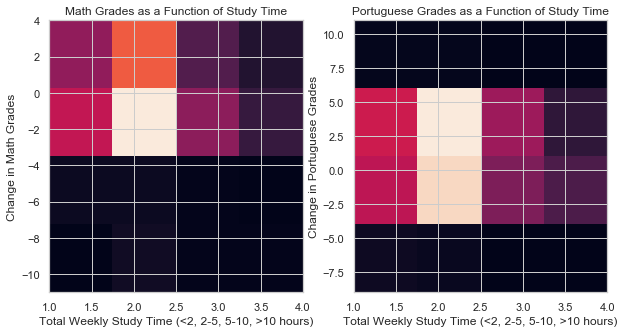

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist2d(x=merged_df['studytime'], y=merged_df['math_growth'], bins=4)
plt.ylabel('Change in Math Grades')
plt.xlabel('Total Weekly Study Time (<2, 2-5, 5-10, >10 hours)')
plt.title('Math Grades as a Function of Study Time')

plt.subplot(1, 2, 2)
plt.hist2d(x=merged_df['studytime'], y=merged_df['port_growth'], bins=4)
plt.ylabel('Change in Portuguese Grades')
plt.xlabel('Total Weekly Study Time (<2, 2-5, 5-10, >10 hours)')
plt.title('Portuguese Grades as a Function of Study Time')

plt.show()

## Comments on Plot 1

Without controlling for other variables, there does not appear to be the expected correlation. It appears that students experience diminishing returns when studying more than 5 hours per week. Most students seem to study 2-5 hours per week and their grades are  more likely to drop in math and rise in Portuguese over the course of the year. 

## So what should we look into next?

Parents may be interested in this next one. I will be exploring whether there is a correlation between paid support in a subject and growth over the course of the year.

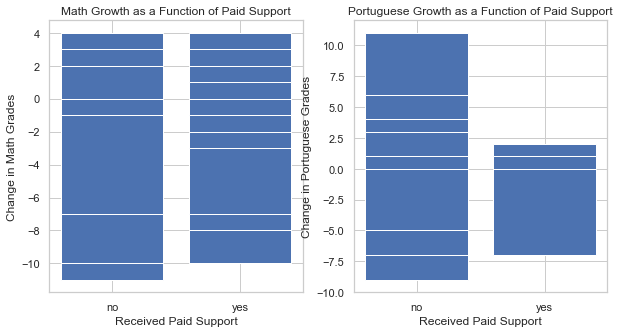

In [10]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(x=merged_df['math_paid'], height=merged_df['math_growth'])
plt.ylabel('Change in Math Grades')
plt.xlabel('Received Paid Support')
plt.title('Math Growth as a Function of Paid Support')

plt.subplot(1, 2, 2)
plt.bar(x=merged_df['port_paid'], height=merged_df['port_growth'])
plt.ylabel('Change in Portuguese Grades')
plt.xlabel('Received Paid Support')
plt.title('Portuguese Growth as a Function of Paid Support')

plt.show()

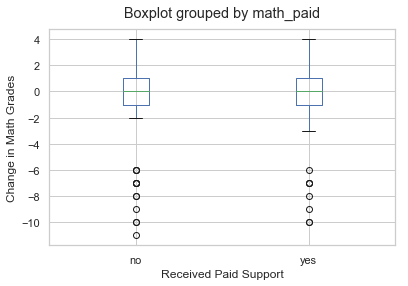

In [11]:
merged_df.boxplot(column='math_growth', by='math_paid')
plt.title('')
plt.xlabel('Received Paid Support')
plt.ylabel('Change in Math Grades')
plt.show()

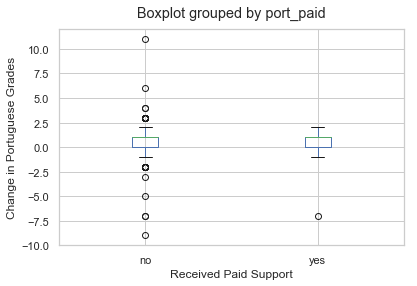

In [12]:
merged_df.boxplot(column='port_growth', by='port_paid')
plt.title('')
plt.xlabel('Received Paid Support')
plt.ylabel('Change in Portuguese Grades')
plt.show()

## Comments on Plot 2

The bar plot was easier to make but did not communicate the message I was hoping to convey. Using the boxplots, I can see that the interquartile ranges for students that paid a tutor and those that did not are comparable. The only striking difference is the lack of outliers for students who received tutoring in Portuguese.

Still this comparison is not telling in itself as there are many other variables that have not been controlled for. One could assume that students receiving tutoring have a history of poor performance and so keeping on track with the rest of the class could be an improvement. 

## School Rivalry
Let's see how one school does compared to another in final grades for math and for Portuguese.

In [19]:
sch_gp_df = merged_df.loc[merged_df['school'] == 'GP']
sch_ms_df = merged_df.loc[merged_df['school'] == 'MS']

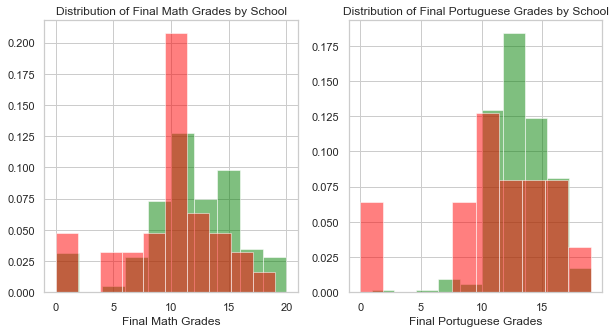

In [26]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(sch_gp_df['math_grades3'], density=True, alpha=.5, color='green')
plt.hist(sch_ms_df['math_grades3'], density=True, alpha=.5, color='red')
plt.title('Distribution of Final Math Grades by School')
plt.xlabel('Final Math Grades')

plt.subplot(1, 2, 2)
plt.hist(sch_gp_df['port_grades3'], density=True, alpha=.5, color='green')
plt.hist(sch_ms_df['port_grades3'], density=True, alpha=.5, color='red')
plt.title('Distribution of Final Portuguese Grades by School')
plt.xlabel('Final Portuguese Grades')

plt.show()

## Comments on Plot 3

It appears that Gabriel Pereira (green) is doing a little bit better than Mousinho da Silveira (red). Silveira has a pretty normal distribution for math grades centered on the median grade. Pereira seems skewed a bit to the right.

In Portuguese, again just from the looks of it, Pereira is skewed right and Silveira is concentrated closer to the median.

## Who wants higher education?

Let's see if there is any correlation between the slightly better end of year performance at Gabriel Pereira school and the number of students that are planning to move on to higher education.

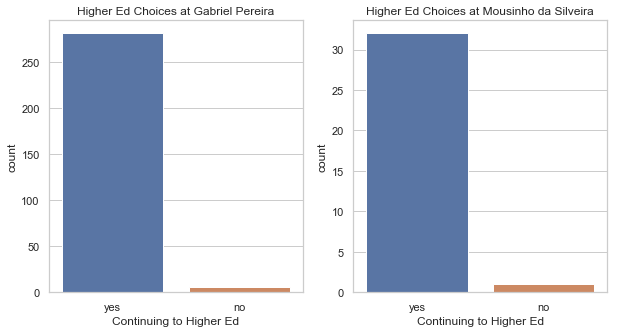

In [38]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.countplot(x='higher', data=sch_gp_df)
plt.title('Higher Ed Choices at Gabriel Pereira')
plt.xlabel('Continuing to Higher Ed')

plt.subplot(1, 2, 2)
sns.countplot(x='higher', data=sch_ms_df)
plt.title('Higher Ed Choices at Mousinho da Silveira')
plt.xlabel('Continuing to Higher Ed')
plt.show()

## Comments on Plot 4

It looks like there is no difference between the two schools in the number of students opting out of higher education. Even though one school may be slightly outperforming the other in final grades relative to their school population. 

There is the temptation to run these features through a neural network to see if any correlations can be determined that would not be easily accessible to us as we look at the data. Education is based on a complex system of interactions and states, however, so processing the data through a neural network would be as likely to illuminate trivial connections as significant ones. This dataset also contains an extremely small dataset to work with for standard feedforward neural networks. The best next step would be to isolate a question based on education research and gather more data and control for confounding variables in order to answer that specific question. 

## Works Cited

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

[Web Link](http://www3.dsi.uminho.pt/pcortez/student.pdf)